# WebScraping MAISON DU MONDE

installo le librerie


<a href="https://colab.research.google.com/drive/1_WyM24eXWf-pdcqJKCcsb1pWwnbEWRi8?authuser=2#scrollTo=VYfg3I_fSt6e"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


In [2]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:7 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Hit:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
chromi

And now we will import some modules on our Notebook


1.   sys: to setup the path of chrome driver
2.   selenium: to emulate the user behaviour
3.   pandas: to work with data
4.   tqdm: to show a progress bar in our notebook
5.   json: to work with json format





In [3]:
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

from selenium import webdriver
from tqdm import tqdm_notebook as tqdm
import pandas
import json
import pprint

First we need to set the options for the ghost browser.
The most important is `--headless` because we are in a "cloud" ntotebook. In our local notebook we can remove the `--headless` option.  


In [4]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

# scraping da sezione letti matrimoniali e singoli


query individuate sul sito : https://www.maisonsdumonde.com/IT/it/c/letti-matrimoniali-e-letti-singoli-753b79b9b2e19310c0036162c3fc311f?sort=popular&page=

per visualizzare il box di ogni singolo letto: section li article
id_letto :  div > section > ol.category-product-list.mt-2 > li
per accedere ad ogni singolo letto ho l’attributo href:  article > div > a 
prezzo di ogni singolo prodotto article > div > div > div span
descrizioni (titolo) e dimensioni   article > div > a h2
immagini:   li > article > div > div > img


In [67]:
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
wd.get("https://www.maisonsdumonde.com/IT/it/c/letti-matrimoniali-e-letti-singoli-753b79b9b2e19310c0036162c3fc311f?sort=popular&page= ")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: use options instead of chrome_options
  """Entry point for launching an IPython kernel.


Populating the interactive namespace from numpy and matplotlib


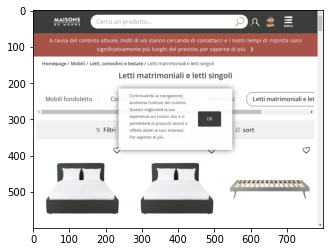

In [68]:
wd.save_screenshot('screenshot.png')

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/screenshot.png')
imgplot = plt.imshow(img)
plt.show()

In [46]:

id_letti = wd.find_elements_by_css_selector("div > section > ol.category-product-list.mt-2 > li")[0].get_attribute("id")

print(id_letti)



product-188395


In [74]:
elenco_letti = wd.find_elements_by_css_selector("section li article")
print(len(elenco_letti))

40


In [75]:
print(elenco_letti[5].text)

Aggiungi alla mia lista dei desideri
BRENT - Letto grigio 140 x 190 in tessuto
399,00 €


In [ ]:
import pprint
for dettaglio_letti in elenco_letti:
  print(dettaglio_letti.text)

In [ ]:
import pprint
articoli_letti = []
for letti in elenco_letti:
  #out of range su product_id - da verificare
  #product_id = letti.find_elements_by_css_selector("div > section > ol.category-product-list.mt-2 > li")[0].get_attribute("id")
  titolo_dim = letti.find_elements_by_css_selector("article > div > a h2")[0].text
  link_letti = letti.find_elements_by_css_selector("article > div > a")[0].get_attribute("href")
  prezzo = letti.find_elements_by_css_selector("article > div > div > div span")[0].text
  #la query però mi fa vedere tutte le immagini, valutare il preliveo di 1 img dal dettaglio
  immagini = letti.find_elements_by_css_selector(" li > article > div > div > img")[0]
  # come prelevo l'id articolo? la query individuata non va bene: "div > section > ol.category-product-list.mt-2 > li"
articoli_letti.append({'titolo_dimensione' : titolo_dim,
                       'link_letti' : link_letti,
                       'prezzo' : prezzo,
                       'immagini' : immagini})

len(articoli_letti)
pprint.pprint(articoli_letti)

In [ ]:
def parse_letti(letti):
  titolo_dimensione = ""
  link_letti = ""
  prezzo = ""
  immagini = ""
  try:
    titolo_dim = letti.find_elements_by_css_selector("article > div > a h2")[0].text
    link_letti = letti.find_elements_by_css_selector("article > div > a")[0].get_attribute("href")
    prezzo = letti.find_elements_by_css_selector("article > div > div > div span")[0].text
    immagini = letti.find_elements_by_css_selector(" li > article > div > div > img")[0]
  except:
    pass
  return {'titolo_dimensione' : titolo_dim,
          'link_letti' : link_letti,
          'prezzo' : prezzo,
          'immagini' : immagini}
  
len(articoli_letti)
pprint.pprint(articoli_letti)

In [ ]:
import time
articoli_letti = []
for num in tqdm(range(1,10)):
  time.sleep(1)
  wd.get(f"https://www.maisonsdumonde.com/IT/it/c/letti-matrimoniali-e-letti-singoli-753b79b9b2e19310c0036162c3fc311f?sort=popular&page={num}")
  elenco_letti = wd.find_elements_by_css_selector("section li article")
  wd.save_screenshot(f'screenshot_{num}.png')
  for letti in elenco_letti:
    articoli_letti.append(parse_letti(letti))

print(len(articoli_letti))

# Provo lo scraping a prelevare il dettaglio di ogni singolo articolo nei dati aggiuntivi (materiali, struttura, provenienza materiali...)

 ##


In [ ]:
#test per verificare gli elementi dentro la pagina di ciascun articolo:
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
wd.get("https://www.maisonsdumonde.com/IT/it/p/letto-160x200-cm-grigio-aspleen-188395.htm?page=1")

In [ ]:
wd.save_screenshot('screenshot.png')

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/screenshot.png')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
lista_caratteristiche = wd.find_elements_by_tag_name("section ul.pl-0 li")
print(len(lista_caratteristiche))

In [ ]:
print((lista_caratteristiche)[1].text)

In [ ]:
codice_articolo = wd.find_elements_by_css_selector("section ul.pl-0 li")[0].text
print(codice_articolo)

In [ ]:
#possibile soluzione ad out of range
codice_articolo = ""
    if (len(lista_caratteristiche) > 0):
      codice_articolo = lista_caratteristiche[0].text